In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import cv2
from skimage.transform import resize
from skimage.io import imread
from sklearn.utils import shuffle
import random
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")


2023-03-31 16:10:40.706057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preprocessing Image Data -Grayscale

In [3]:
Categories=['rock','paper','scissors']
train_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/train'
test_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/test'
val_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.284348,0.297354,0.313321,0.336375,0.348745,0.359453,0.364130,0.370838,0.378704,0.384568,...,0.362042,0.359737,0.354575,0.350273,0.344003,0.336455,0.329440,0.326312,0.321663,0.312047
1,0.304267,0.309151,0.315684,0.326809,0.334907,0.342741,0.345765,0.349956,0.353411,0.358536,...,0.367493,0.365742,0.360479,0.355597,0.352232,0.343676,0.338224,0.335972,0.331903,0.324436
2,0.317973,0.321166,0.327402,0.338706,0.344916,0.354000,0.358446,0.363010,0.367416,0.371537,...,0.365138,0.376308,0.378158,0.374654,0.371060,0.363793,0.357014,0.353654,0.348882,0.339495
3,0.434079,0.443543,0.454310,0.465256,0.473619,0.483946,0.487627,0.493068,0.495262,0.501782,...,0.494751,0.489472,0.481426,0.465708,0.433235,0.401956,0.390577,0.384184,0.377176,0.370118
4,0.319114,0.321382,0.328557,0.338685,0.343122,0.351620,0.354666,0.358548,0.362823,0.369092,...,0.376347,0.374983,0.370926,0.365676,0.360789,0.353402,0.346790,0.344862,0.340304,0.332514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.317458,0.324743,0.334259,0.344573,0.353778,0.363156,0.366968,0.372741,0.377429,0.384629,...,0.385077,0.382807,0.379498,0.377461,0.369716,0.360159,0.354411,0.346691,0.342160,0.338577
1527,0.317021,0.322916,0.331836,0.342479,0.349516,0.358961,0.364288,0.369521,0.375182,0.382394,...,0.369951,0.365180,0.355349,0.342983,0.332119,0.320491,0.315504,0.316368,0.315536,0.311280
1528,0.361844,0.364937,0.370878,0.381801,0.390075,0.397263,0.403214,0.409365,0.416429,0.422234,...,0.332812,0.334786,0.331869,0.342953,0.359435,0.361635,0.360172,0.362851,0.361314,0.353466
1529,0.421583,0.428312,0.434783,0.442705,0.450507,0.456454,0.457194,0.460205,0.463888,0.467979,...,0.416330,0.412189,0.407762,0.403442,0.396639,0.389534,0.387599,0.383056,0.377605,0.375555


In [4]:
y_train

0       1
1       0
2       0
3       2
4       1
       ..
1526    2
1527    2
1528    1
1529    2
1530    2
Name: Target, Length: 1531, dtype: int64

# Model Construction

## LDA
### Basic Metric

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
def test_score(trained_model):
    pred_y = trained_model.predict(x_test)
    print(confusion_matrix(y_test,pred_y))
    print(classification_report(y_test,pred_y))

def train_score(trained_model):
    pred_y = trained_model.predict(x_train)
    print(confusion_matrix(y_train,pred_y))
    print(classification_report(y_train,pred_y))
    
def val_score(trained_model):
    pred_y = trained_model.predict(x_val)
    print(confusion_matrix(y_val,pred_y))
    print(classification_report(y_val,pred_y))

In [7]:
# Basic Metric

lda_base = LinearDiscriminantAnalysis()
lda_base.fit(x_train, y_train)

#y_pred= model.predict(x_train)
#model.decision_function(x_train)
#confusion_matrix(y_train, y_pred)
#print(classification_report(y_train, y_pred))
train_score(lda_base)
val_score(lda_base)

[[495   2  11]
 [  1 494   3]
 [  2   1 522]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       508
           1       0.99      0.99      0.99       498
           2       0.97      0.99      0.98       525

    accuracy                           0.99      1531
   macro avg       0.99      0.99      0.99      1531
weighted avg       0.99      0.99      0.99      1531

[[74 11 24]
 [27 62 18]
 [26 24 62]]
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       109
           1       0.64      0.58      0.61       107
           2       0.60      0.55      0.57       112

    accuracy                           0.60       328
   macro avg       0.61      0.60      0.60       328
weighted avg       0.61      0.60      0.60       328



### LDA  - lsqr & eigen

In [8]:
#Parameter tuning with GridSearchCV 


estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto')
parameters_1 = {
    'solver': ('lsqr','eigen'),  #note svd does not run with shrinkage and models using it will be tuned separately
    'n_components': (1,2),
                   }
# with GridSearch
grid_search_lda_A = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [9]:
lda_A1=grid_search_lda_A.fit(x_train, y_train)
train_score(lda_A1)
val_score(lda_A1)
#y_pred_1 =lda_A1.predict(x_train)
#print(confusion_matrix(y_train, y_pred_1))
#print(classification_report(y_train, y_pred_1))

[[452  18  38]
 [ 14 439  45]
 [ 22  14 489]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       508
           1       0.93      0.88      0.91       498
           2       0.85      0.93      0.89       525

    accuracy                           0.90      1531
   macro avg       0.90      0.90      0.90      1531
weighted avg       0.90      0.90      0.90      1531

[[83  6 20]
 [14 72 21]
 [17 15 80]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       109
           1       0.77      0.67      0.72       107
           2       0.66      0.71      0.69       112

    accuracy                           0.72       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.72      0.72      0.72       328



In [10]:
print(grid_search_lda_A.best_params_)

{'n_components': 1, 'solver': 'lsqr'}


## LDA ~ svd

In [11]:
estimator_2 = LinearDiscriminantAnalysis(solver='svd', )#note svd does not run with shrinkage and models using it will be tuned separately
parameters_2 = {
    'n_components': (1,2),
    'store_covariance' :(True, False),
                   }
# with GridSearch
grid_search_lda_B = GridSearchCV(
    estimator=estimator_2,
    param_grid=parameters_2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [12]:
lda_B1=grid_search_lda_B.fit(x_train, y_train)
train_score(lda_B1)
val_score(lda_B1)

[[495   2  11]
 [  1 494   3]
 [  2   1 522]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       508
           1       0.99      0.99      0.99       498
           2       0.97      0.99      0.98       525

    accuracy                           0.99      1531
   macro avg       0.99      0.99      0.99      1531
weighted avg       0.99      0.99      0.99      1531

[[74 11 24]
 [27 62 18]
 [26 24 62]]
              precision    recall  f1-score   support

           0       0.58      0.68      0.63       109
           1       0.64      0.58      0.61       107
           2       0.60      0.55      0.57       112

    accuracy                           0.60       328
   macro avg       0.61      0.60      0.60       328
weighted avg       0.61      0.60      0.60       328



In [13]:
print(grid_search_lda_B.best_params_)

{'n_components': 1, 'store_covariance': True}


In [14]:
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


train_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[452  18  38]
 [ 14 439  45]
 [ 22  14 489]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       508
           1       0.93      0.88      0.91       498
           2       0.85      0.93      0.89       525

    accuracy                           0.90      1531
   macro avg       0.90      0.90      0.90      1531
weighted avg       0.90      0.90      0.90      1531

[[452  18  38]
 [ 14 439  45]
 [ 22  14 489]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       508
           1       0.93      0.88      0.91       498
           2       0.85      0.93      0.89       525

    accuracy                           0.90      1531
   macro avg       0.90      0.90      0.90      1531
weighted avg       0.90      0.90      0.90      1531

[[452  18  38]
 [ 14 439  45]
 [ 22  14 489]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91  

In [15]:
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


val_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[83  6 20]
 [14 72 21]
 [17 15 80]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       109
           1       0.77      0.67      0.72       107
           2       0.66      0.71      0.69       112

    accuracy                           0.72       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.72      0.72      0.72       328

[[83  6 20]
 [14 72 21]
 [17 15 80]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       109
           1       0.77      0.67      0.72       107
           2       0.66      0.71      0.69       112

    accuracy                           0.72       328
   macro avg       0.72      0.72      0.72       328
weighted avg       0.72      0.72      0.72       328

[[83  6 20]
 [14 72 21]
 [17 15 80]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       109
           1      

In [16]:
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis( solver='svd',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[85  7 17]
 [17 71 19]
 [22 16 75]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       109
           1       0.76      0.66      0.71       107
           2       0.68      0.66      0.67       113

    accuracy                           0.70       329
   macro avg       0.71      0.70      0.70       329
weighted avg       0.70      0.70      0.70       329

[[85  7 17]
 [17 71 19]
 [22 16 75]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       109
           1       0.76      0.66      0.71       107
           2       0.68      0.66      0.67       113

    accuracy                           0.70       329
   macro avg       0.71      0.70      0.70       329
weighted avg       0.70      0.70      0.70       329

[[85  7 17]
 [17 71 19]
 [22 16 75]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       109
           1      

# Real Images

In [17]:
Categories=['rock','paper','scissors']
self_test_dir = '/Users/hanyijia/Desktop/Midterm_Project/real'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,1))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [19]:
best_model = LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train)

In [20]:
y_pred_self = best_model.predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self))
print(classification_report(y_self_test, y_pred_self))


[[0 1 4]
 [2 3 0]
 [1 2 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.60      0.55         5
           2       0.20      0.25      0.22         4

    accuracy                           0.29        14
   macro avg       0.23      0.28      0.26        14
weighted avg       0.24      0.29      0.26        14



# Preprocessing Image - 3 color channels

In [4]:
Categories=['rock','paper','scissors']
train_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/train'
test_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/test'
val_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


In [22]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.102194,0.444992,0.135836,0.112751,0.459815,0.147550,0.125921,0.478260,0.161213,0.143804,...,0.163256,0.136473,0.499412,0.159842,0.137262,0.491267,0.156954,0.135339,0.478176,0.146796
1,0.121430,0.455724,0.175348,0.119495,0.464168,0.179721,0.122617,0.472050,0.186888,0.129316,...,0.205825,0.129695,0.502115,0.200263,0.134544,0.494757,0.194046,0.138401,0.481780,0.186596
2,0.134954,0.483106,0.161084,0.133641,0.488475,0.164305,0.135341,0.496776,0.170826,0.145869,...,0.198906,0.155011,0.527030,0.195420,0.156122,0.519059,0.191351,0.153446,0.506500,0.181782
3,0.279692,0.605938,0.234714,0.286369,0.617099,0.243470,0.292813,0.630146,0.253869,0.302303,...,0.189960,0.212207,0.563124,0.187836,0.208112,0.552801,0.184736,0.207208,0.541680,0.179889
4,0.113330,0.494130,0.164646,0.116477,0.496185,0.166473,0.121879,0.504746,0.172571,0.130712,...,0.192794,0.130974,0.524209,0.189583,0.131893,0.517254,0.184485,0.132387,0.504592,0.178439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,0.141204,0.476346,0.166657,0.143017,0.486477,0.173556,0.147825,0.498679,0.182253,0.155500,...,0.178465,0.144751,0.530192,0.170916,0.145742,0.522791,0.166768,0.148173,0.515571,0.164658
1527,0.129372,0.479174,0.170895,0.131359,0.487556,0.175582,0.134747,0.499410,0.183991,0.143919,...,0.168821,0.114848,0.486516,0.167657,0.117761,0.483922,0.166708,0.119823,0.476000,0.163681
1528,0.137241,0.536132,0.227693,0.137057,0.541904,0.228550,0.141502,0.548716,0.234195,0.151002,...,0.218816,0.147365,0.536301,0.221310,0.150079,0.529920,0.225495,0.151554,0.514688,0.223520
1529,0.195964,0.602389,0.275032,0.201899,0.610177,0.280377,0.205010,0.618302,0.286804,0.211289,...,0.230975,0.157773,0.568914,0.225772,0.159223,0.560778,0.218945,0.165199,0.554145,0.218303


In [23]:
y_train 

0       1
1       0
2       0
3       2
4       1
       ..
1526    2
1527    2
1528    1
1529    2
1530    2
Name: Target, Length: 1531, dtype: int64

# LDA - Base

In [24]:
# Basic Metric

lda_base = LinearDiscriminantAnalysis()
lda_base.fit(x_train, y_train)

#y_pred= model.predict(x_train)
#model.decision_function(x_train)
#confusion_matrix(y_train, y_pred)
#print(classification_report(y_train, y_pred))
train_score(lda_base)
val_score(lda_base)

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[91 10  8]
 [17 75 15]
 [ 6 16 90]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       109
           1       0.74      0.70      0.72       107
           2       0.80      0.80      0.80       112

    accuracy                           0.78       328
   macro avg       0.78      0.78      0.78       328
weighted avg       0.78      0.78      0.78       328



# LDA - lsqr&eigen 

In [25]:
#Parameter tuning with GridSearchCV 


estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto')
parameters_1 = {
    'solver': ('lsqr','eigen'),  #note svd does not run with shrinkage and models using it will be tuned separately
    'n_components': (1,2),
                   }
# with GridSearch
grid_search_lda_A = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [26]:
lda_A1=grid_search_lda_A.fit(x_train, y_train)
train_score(lda_A1)
val_score(lda_A1)

[[504   0   4]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       508
           1       1.00      1.00      1.00       498
           2       0.99      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[ 93   6  10]
 [  8  91   8]
 [  1   5 106]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       109
           1       0.89      0.85      0.87       107
           2       0.85      0.95      0.90       112

    accuracy                           0.88       328
   macro avg       0.89      0.88      0.88       328
weighted avg       0.89      0.88      0.88       328



In [27]:
print(grid_search_lda_A.best_params_)

{'n_components': 1, 'solver': 'lsqr'}


## LDA ~ svd

In [28]:
estimator_2 = LinearDiscriminantAnalysis(solver='svd', )#note svd does not run with shrinkage and models using it will be tuned separately
parameters_2 = {
    'n_components': (1,2),
    'store_covariance' :(True, False),
                   }
# with GridSearch
grid_search_lda_B = GridSearchCV(
    estimator=estimator_2,
    param_grid=parameters_2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [29]:
lda_B1=grid_search_lda_B.fit(x_train, y_train)
train_score(lda_B1)
val_score(lda_B1)

[[508   0   0]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[91 10  8]
 [17 75 15]
 [ 6 16 90]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       109
           1       0.74      0.70      0.72       107
           2       0.80      0.80      0.80       112

    accuracy                           0.78       328
   macro avg       0.78      0.78      0.78       328
weighted avg       0.78      0.78      0.78       328



## Parameter Tuning

In [ ]:
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


train_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[504   0   4]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       508
           1       1.00      1.00      1.00       498
           2       0.99      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[504   0   4]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       508
           1       1.00      1.00      1.00       498
           2       0.99      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[504   0   4]
 [  0 498   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00  

In [ ]:
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))        # Best Validation Accuracy
val_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


val_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[ 93   6  10]
 [  8  91   8]
 [  1   5 106]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       109
           1       0.89      0.85      0.87       107
           2       0.85      0.95      0.90       112

    accuracy                           0.88       328
   macro avg       0.89      0.88      0.88       328
weighted avg       0.89      0.88      0.88       328

[[ 93   6  10]
 [  8  91   8]
 [  1   5 106]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       109
           1       0.89      0.85      0.87       107
           2       0.85      0.95      0.90       112

    accuracy                           0.88       328
   macro avg       0.89      0.88      0.88       328
weighted avg       0.89      0.88      0.88       328

[[ 93   6  10]
 [  8  91   8]
 [  1   5 106]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88  

In [ ]:
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train)) 
test_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


test_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[101   3   5]
 [  3  96   8]
 [  5   3 105]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       109
           1       0.94      0.90      0.92       107
           2       0.89      0.93      0.91       113

    accuracy                           0.92       329
   macro avg       0.92      0.92      0.92       329
weighted avg       0.92      0.92      0.92       329

[[101   3   5]
 [  3  96   8]
 [  5   3 105]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       109
           1       0.94      0.90      0.92       107
           2       0.89      0.93      0.91       113

    accuracy                           0.92       329
   macro avg       0.92      0.92      0.92       329
weighted avg       0.92      0.92      0.92       329

[[101   3   5]
 [  3  96   8]
 [  5   3 105]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93  

# Compare misclassified and correctly classified images


In [30]:
best_model = LinearDiscriminantAnalysis(shrinkage=0.7, solver='eigen',n_components=1    ).fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
y_test
y_pred_test

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,

In [31]:
from PIL import Image as im

missclassified_indices = []
for i in range(0,y_test.size):
    if y_test[i] != y_pred_test[i]:
        missclassified_indices.append(i)

In [ ]:
missclassified_indices

[1,
 23,
 32,
 36,
 50,
 66,
 78,
 83,
 89,
 105,
 109,
 111,
 115,
 119,
 123,
 138,
 147,
 155,
 156,
 159,
 171,
 206,
 217,
 231,
 247,
 252,
 260,
 267,
 271,
 299,
 325]

Predicted class 1
Actual class 2


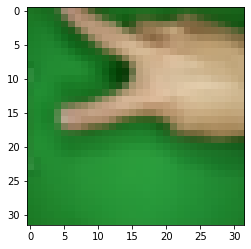

In [ ]:
plt.imshow(np.reshape(np.array(x_test.T[325]), (32, 32, 3)))
print("Predicted class",y_pred_test[325])
print("Actual class",y_test[325])

Predicted class 2
Actual class 1


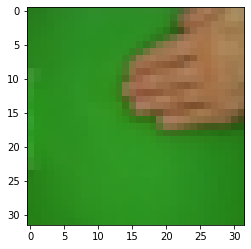

In [ ]:
plt.imshow(np.reshape(np.array(x_test.T[159]), (32, 32, 3 )))
print("Predicted class",y_pred_test[159])
print("Actual class",y_test[159])

Predicted class 2
Actual class 0


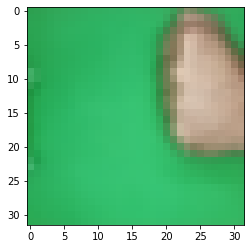

In [ ]:
plt.imshow(np.reshape(np.array(x_test.T[32]), (32, 32, 3)))
print("Predicted class",y_pred_test[32])
print("Actual class",y_test[32])

## Real Images

In [5]:
Categories=['rock','paper','scissors']
self_test_dir = '/Users/hanyijia/Desktop/Midterm_Project/real'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [33]:
y_pred_self = best_model.predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self))
print(classification_report(y_self_test, y_pred_self))

[[3 2 0]
 [2 3 0]
 [0 1 3]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.60      0.55         5
           2       1.00      0.75      0.86         4

    accuracy                           0.64        14
   macro avg       0.70      0.65      0.67        14
weighted avg       0.68      0.64      0.65        14



In [34]:
y_pred_self2 = LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train).predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self2))
print(classification_report(y_self_test, y_pred_self2))

[[4 0 1]
 [3 1 1]
 [1 1 2]]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.50      0.20      0.29         5
           2       0.50      0.50      0.50         4

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.47        14
weighted avg       0.50      0.50      0.46        14



In [35]:
y_pred_self3 = LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train).predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self3))
print(classification_report(y_self_test, y_pred_self3))

[[5 0 0]
 [3 2 0]
 [3 1 0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         4

    accuracy                           0.50        14
   macro avg       0.37      0.47      0.38        14
weighted avg       0.40      0.50      0.40        14



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preprocessing Images - 3 color + Augmentation

In [6]:
import Augmentor

# Passing the path of the image directory
p = Augmentor.Pipeline(os.path.join(train_dir,'rock'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(508)

p = Augmentor.Pipeline(os.path.join(train_dir,'paper'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(498)

p = Augmentor.Pipeline(os.path.join(train_dir,'scissors'))
  
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(525)

Initialised with 508 image(s) found.
Output directory set to /Users/hanyijia/Desktop/Midterm_Project/rps-split/train/rock/output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x1A5A7B8E0>: 100%|██████████| 508/508 [00:10<00:00, 46.48 Samples/s]                


Initialised with 498 image(s) found.
Output directory set to /Users/hanyijia/Desktop/Midterm_Project/rps-split/train/paper/output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x1A589BB50>: 100%|██████████| 498/498 [00:13<00:00, 37.44 Samples/s]                


Initialised with 525 image(s) found.
Output directory set to /Users/hanyijia/Desktop/Midterm_Project/rps-split/train/scissors/output.

Processing <PIL.Image.Image image mode=RGB size=300x200 at 0x1A58BC400>: 100%|██████████| 525/525 [00:12<00:00, 42.81 Samples/s]                


In [12]:
Categories=['rock','paper','scissors']


train_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-augmented'
test_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/test'
val_dir = '/Users/hanyijia/Desktop/Midterm_Project/rps-split/val'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(train_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_train=df.iloc[:,:-1] #input data 
y_train=df.iloc[:,-1] #output data
x_train=x_train.sample(frac=1, random_state=42).reset_index(drop=True)
y_train=y_train.sample(frac=1, random_state=42).reset_index(drop=True)



flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for test')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_test=df.iloc[:,:-1] #input data 
y_test=df.iloc[:,-1] #output data

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(val_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for val')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x_val=df.iloc[:,:-1] #input data 
y_val=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train
loaded category:rock successfully for test
loaded category:paper successfully for test
loaded category:scissors successfully for test
loaded category:rock successfully for val
loaded category:paper successfully for val
loaded category:scissors successfully for val


# LDA - Base

In [13]:
# Basic Metric

lda_base = LinearDiscriminantAnalysis()
lda_base.fit(x_train, y_train)

#y_pred= model.predict(x_train)
#model.decision_function(x_train)
#confusion_matrix(y_train, y_pred)
#print(classification_report(y_train, y_pred))
train_score(lda_base)
val_score(lda_base)

[[508   0   0]
 [  1 497   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[65 22 22]
 [54 35 18]
 [44 29 39]]
              precision    recall  f1-score   support

           0       0.40      0.60      0.48       109
           1       0.41      0.33      0.36       107
           2       0.49      0.35      0.41       112

    accuracy                           0.42       328
   macro avg       0.43      0.42      0.42       328
weighted avg       0.43      0.42      0.42       328



# LDA - lsqr & eigen

In [14]:
#Parameter tuning with GridSearchCV 


estimator_1 = LinearDiscriminantAnalysis(shrinkage='auto')
parameters_1 = {
    'solver': ('lsqr','eigen'),  #note svd does not run with shrinkage and models using it will be tuned separately
    'n_components': (1,2),
                   }
# with GridSearch
grid_search_lda_A = GridSearchCV(
    estimator=estimator_1,
    param_grid=parameters_1,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [15]:
lda_A1=grid_search_lda_A.fit(x_train, y_train)
train_score(lda_A1)
val_score(lda_A1)

[[487   3  18]
 [  4 483  11]
 [ 15  10 500]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.97      0.97      0.97       498
           2       0.95      0.95      0.95       525

    accuracy                           0.96      1531
   macro avg       0.96      0.96      0.96      1531
weighted avg       0.96      0.96      0.96      1531

[[83  8 18]
 [15 74 18]
 [13 27 72]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1       0.68      0.69      0.69       107
           2       0.67      0.64      0.65       112

    accuracy                           0.70       328
   macro avg       0.70      0.70      0.70       328
weighted avg       0.70      0.70      0.70       328



# LDA - svd

In [16]:
estimator_2 = LinearDiscriminantAnalysis(solver='svd', )#note svd does not run with shrinkage and models using it will be tuned separately
parameters_2 = {
    'n_components': (1,2),
    'store_covariance' :(True, False),
                   }
# with GridSearch
grid_search_lda_B = GridSearchCV(
    estimator=estimator_2,
    param_grid=parameters_2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    cv = 5
)

In [17]:
lda_B1=grid_search_lda_B.fit(x_train, y_train)
train_score(lda_B1)
val_score(lda_B1)

[[508   0   0]
 [  1 497   0]
 [  0   0 525]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       508
           1       1.00      1.00      1.00       498
           2       1.00      1.00      1.00       525

    accuracy                           1.00      1531
   macro avg       1.00      1.00      1.00      1531
weighted avg       1.00      1.00      1.00      1531

[[65 22 22]
 [54 35 18]
 [44 29 39]]
              precision    recall  f1-score   support

           0       0.40      0.60      0.48       109
           1       0.41      0.33      0.36       107
           2       0.49      0.35      0.41       112

    accuracy                           0.42       328
   macro avg       0.43      0.42      0.42       328
weighted avg       0.43      0.42      0.42       328



## Parameter Tuning

In [18]:
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


train_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
train_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[487   3  18]
 [  4 483  11]
 [ 15  10 500]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.97      0.97      0.97       498
           2       0.95      0.95      0.95       525

    accuracy                           0.96      1531
   macro avg       0.96      0.96      0.96      1531
weighted avg       0.96      0.96      0.96      1531

[[487   3  18]
 [  4 483  11]
 [ 15  10 500]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       508
           1       0.97      0.97      0.97       498
           2       0.95      0.95      0.95       525

    accuracy                           0.96      1531
   macro avg       0.96      0.96      0.96      1531
weighted avg       0.96      0.96      0.96      1531

[[487   3  18]
 [  4 483  11]
 [ 15  10 500]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96  

In [19]:
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train))        
val_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


val_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
val_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[83  8 18]
 [15 74 18]
 [13 27 72]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1       0.68      0.69      0.69       107
           2       0.67      0.64      0.65       112

    accuracy                           0.70       328
   macro avg       0.70      0.70      0.70       328
weighted avg       0.70      0.70      0.70       328

[[83  8 18]
 [15 74 18]
 [13 27 72]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1       0.68      0.69      0.69       107
           2       0.67      0.64      0.65       112

    accuracy                           0.70       328
   macro avg       0.70      0.70      0.70       328
weighted avg       0.70      0.70      0.70       328

[[83  8 18]
 [15 74 18]
 [13 27 72]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       109
           1      

In [20]:
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=2    ).fit(x_train, y_train))

test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.1, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.3, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage= 0.7, solver='eigen',n_components=1    ).fit(x_train, y_train)) 
test_score(LinearDiscriminantAnalysis(shrinkage= 0.9, solver='eigen',n_components=1    ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen',n_components=2    ).fit(x_train, y_train))


test_score(LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train))
test_score(LinearDiscriminantAnalysis( solver='svd',n_components=2    ).fit(x_train, y_train))

[[83  6 20]
 [13 74 20]
 [22 22 69]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       109
           1       0.73      0.69      0.71       107
           2       0.63      0.61      0.62       113

    accuracy                           0.69       329
   macro avg       0.69      0.69      0.69       329
weighted avg       0.69      0.69      0.69       329

[[83  6 20]
 [13 74 20]
 [22 22 69]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       109
           1       0.73      0.69      0.71       107
           2       0.63      0.61      0.62       113

    accuracy                           0.69       329
   macro avg       0.69      0.69      0.69       329
weighted avg       0.69      0.69      0.69       329

[[83  6 20]
 [13 74 20]
 [22 22 69]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       109
           1      

## Real Images

In [21]:
Categories=['rock','paper','scissors']
self_test_dir = '/Users/hanyijia/Desktop/Midterm_Project/real'

flat_data_arr=[] #input array
target_arr=[] #output array
for i in Categories:
    path=os.path.join(self_test_dir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(32,32,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully for train')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
self_test=df.iloc[:,:-1] #input data
y_self_test=df.iloc[:,-1] #output data

loaded category:rock successfully for train
loaded category:paper successfully for train
loaded category:scissors successfully for train


In [22]:
y_pred_self = LinearDiscriminantAnalysis(shrinkage= 0.5, solver='eigen',n_components=1    ).fit(x_train, y_train).predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self))
print(classification_report(y_self_test, y_pred_self))

[[3 1 1]
 [3 2 0]
 [1 1 2]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.50      0.40      0.44         5
           2       0.67      0.50      0.57         4

    accuracy                           0.50        14
   macro avg       0.53      0.50      0.51        14
weighted avg       0.52      0.50      0.50        14



In [23]:
y_pred_self2 = LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',n_components=1    ).fit(x_train, y_train).predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self2))
print(classification_report(y_self_test, y_pred_self2))

[[3 0 2]
 [3 2 0]
 [1 1 2]]
              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.67      0.40      0.50         5
           2       0.50      0.50      0.50         4

    accuracy                           0.50        14
   macro avg       0.53      0.50      0.50        14
weighted avg       0.53      0.50      0.50        14



In [24]:
y_pred_self3 = LinearDiscriminantAnalysis( solver='svd',n_components=1   ).fit(x_train, y_train).predict(self_test)
print(confusion_matrix(y_self_test, y_pred_self3))
print(classification_report(y_self_test, y_pred_self3))

[[3 1 1]
 [1 2 2]
 [1 0 3]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.67      0.40      0.50         5
           2       0.50      0.75      0.60         4

    accuracy                           0.57        14
   macro avg       0.59      0.58      0.57        14
weighted avg       0.60      0.57      0.56        14

